In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm 
import cvxopt as opt
from cvxopt import blas, solvers
import pandas as pd
import statistics 
import plotly
import cufflinks

np.random.seed(123)

In [38]:
import plotly.express as px
import plotly.offline as pyo
from plotly.offline import plot
from plotly.tools import mpl_to_plotly


# Markowitz Portfolio Optimization (Modern Portfolio Theory)

The following source was used as inspiration and instruction for this investigation into Modern Portfolio Theory (MPT): [https://plotly.com/python/v3/ipython-notebooks/markowitz-portfolio-optimization/](https://plotly.com/python/v3/ipython-notebooks/markowitz-portfolio-optimization/ )

## Library Explanation
- **cvxopt:** Python Software for Convex Optimization - CVXOPT is a free software package for convex optimization based on the Python programming language. 
- **plotly:** Plotly is a free and open-source graphing library for Python. Plotly is well suited for creating interactive visualizations for web-based interactions
    - Maplotlib is a great starting tool.
    - Seaborn is fantastic for creating complex visuals with minimal code. 
- **cufflinks:** Allows for direct plotting from a Pandas dataframe using Plotly   

1. ## Simulate random asset return data.

_Returns represent the gains or losses experienced by an investor over the course of holding the asset_

Assuming that there exist 4 assets, to simulate a return over 1000 intervals representing the holding time of each asset.

The below visualization showcases the Normal or Gaussian Distribution sampled from. 

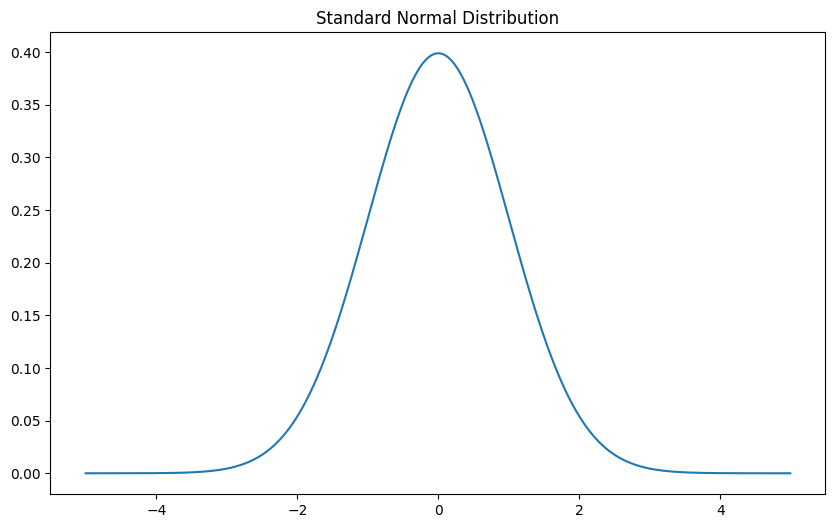

In [26]:
fig = plt.figure(figsize=(10, 6))
x_range = np.arange(-5, 5, 0.01)
mean = 0
sd = 1
plt.plot(x_range, norm.pdf(x_range, mean, sd))
plt.title('Standard Normal Distribution')
plt.show()

In [30]:
asset_no = 4
obs_no = 100

asset_returns = np.random.randn(asset_no, obs_no)

The `iplot_mpl` allows for the creation of an interactive plot inside of a Jupyter notebook

In [41]:
fig = plt.figure(figsize=(20, 12))
plt.plot(asset_returns.T, alpha=0.4)
plt.xlabel('Time')
plt.ylabel('Asset returns')

plotly_fig = mpl_to_plotly(fig)
pyo.init_notebook_mode(connected=True)
pyo.iplot(plotly_fig, filename='random returns')

2. #### Create random weights to serve as portfolios
The combination of the above random returns combined with sets of random weights allows for the creation of a wide range of portfolios, which have different returns and risks (standard deviation)

_The random weights determine the proportion of your investment allocated to each asset. Note, the sum of weights per portfolio must sum to 1 for a fully invested portfolio_

In [42]:
def random_weighting(n):
    """Produce n random weights for each of the n assets to provide a full investment portfolio accross the available assets"""
    k = np.random.rand(n)  # Produces 4 random values between [0, 1] from a uniform distribution
    return k / sum(k)

In [45]:
portfolio_weighting_1 = random_weighting(asset_no)
print(portfolio_weighting_1)
assert(sum(portfolio_weighting_1) == 1)

[0.031475   0.42645095 0.32393809 0.21813596]


3. ## Calculate Expected Return for each portfolio

The expected return equation is: 

$$R = p^Tw$$
Where: 
- R -> The expected return
- $p^T$ -> Transpose for the vector of the mean of the mean returns for each time series (and asset)
- w -> The weight vector of the portfolio

In [47]:
p = np.asmatrix(np.mean(asset_returns, axis=1))  # Axis=1 means calculation along row
print(p)

[[ 0.02793002  0.10821789  0.03452736 -0.11908567]]


In [48]:
w =np.asmatrix(portfolio_weighting_1)
print(w)

[[0.031475   0.42645095 0.32393809 0.21813596]]


In [55]:
R = w * p.T
print(R)

[[0.03223658]]


The resulting expected return is a scaler result. 